### Chargement des librarires :

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np

### Chargement des bases de données liées aux utilisateurs avec la méthode "read_csv" de pandas pour les années 2017 à 2021 :


In [17]:
df_usagers_2021 = pd.read_csv("data/usagers-2021.csv", sep=';')
df_usagers_2020 = pd.read_csv("data/usagers-2020.csv", sep=';')
df_usagers_2019 = pd.read_csv("data/usagers-2019.csv", sep=';')

### Fusion et nettoyage des dataframes :

In [18]:
# Utilisation de la méthode "concat" pour assembler les cinq dataframes
df = [df_usagers_2019, df_usagers_2020, df_usagers_2021]
usagers_2019_2021 = pd.concat(df)

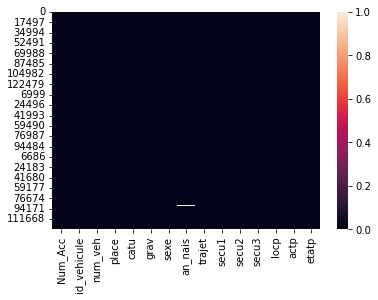

In [19]:
#Visualisation des valeurs manquantes à l'aide d'une carte thermique
sns.heatmap(usagers_2019_2021.isna());

In [20]:
#Recodage des valeurs -1 et 0 ('non renseigné') par des NaN
usagers_2019_2021["actp"] = usagers_2019_2021['actp'].apply(lambda x: pd.to_numeric(x, errors = 'ignore'))
usagers_2019_2021 = usagers_2019_2021.replace(-1, np.nan)

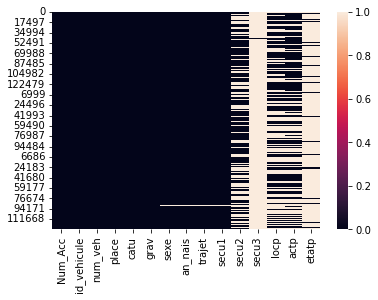

In [21]:
#Visualisation des valeurs manquantes après nettoyage
sns.heatmap(usagers_2019_2021.isna());

In [22]:
#remplacement des -1 (non renseigné) par des NaN(Not a Number)
usagers_2019_2021 = usagers_2019_2021.replace(0, np.nan)

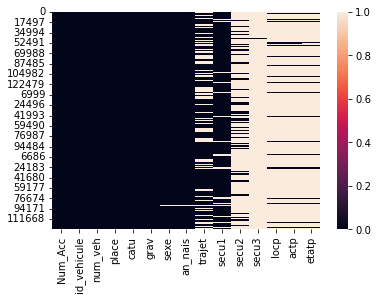

In [23]:
sns.heatmap(usagers_2019_2021.isna());

In [24]:
#export du df final
usagers_2019_2021.to_csv("merged_tables/usagers_2019_2021.csv", index=False)

### Quelques statistiques...
##### Répartition de la variable catégorielle "grav" où :
**1** - Indemne \
**2** - Tué \
**3** - Blesssé hospitalisé \
**4** - Blessé léger 

In [25]:
usagers_2019_2021['grav'].value_counts()

1.0    153689
4.0    147461
3.0     56718
2.0      9497
Name: grav, dtype: int64

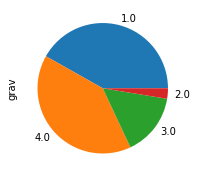

In [26]:
usagers_2019_2021['grav'].value_counts().plot.pie(subplots=True, figsize = (3, 3));

In [27]:
#groupons les données du dataframe en fonction de la gravité 
grouped_grav = usagers_2019_2021.groupby("grav")

#accedons à cette nouvelle variable en comptant le nombre d'occurences pour chaque modalité de la variable sexe
print(grouped_grav['sexe'].value_counts())

grav  sexe
1.0   1.0     108034
      2.0      42653
2.0   1.0       7430
      2.0       2067
3.0   1.0      40407
      2.0      16311
4.0   1.0      93167
      2.0      54294
Name: sexe, dtype: int64


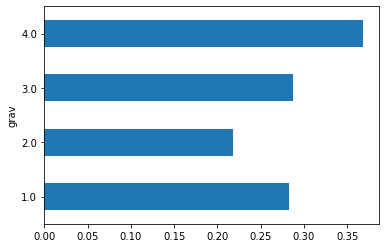

In [28]:
(
usagers_2019_2021
    .query("grav!=-1")
    .query("sexe!=-1")
    .assign(sexe= lambda x: x.sexe -1)
    .groupby("grav")
    .sexe.mean()
    .plot(kind="barh")
);

##### D'après le diagramme en barres ci-dessus, entre 2019 et 2021 :

-  % des usagers accidentés et décédés sont des femmes 
-  % des usagers accidentés et indemnes sont des femmes
-  % des usages accidentés ayant été blessé et hospitalisé sont des femmes
-  % des usagers accidentés ayant été blessé léger (sans hospitalisation) sont des femmes

-----------------------------------------------------------------------
<i>grav = gravité de blessure de l'usager, les usagers accidentés sont classés en trois catégories de victimes plus les indemnes :
1 – Indemne
2 – Tué
3 – Blessé hospitalisé
4 – Blessé léger</i>

In [14]:
#Convertir une variable codée de 1 à 4 en catégorie pour analyse :
# Convertir la variable en type 'category' et spécifier l'ordre des catégories
#df['variable'] = df['variable'].astype('category')
#df['variable'].cat.set_categories([1, 2, 3, 4], ordered=True, inplace=True)
# Vérifier le résultat
#print(df['variable'])

In [15]:
# Créer une nouvelle variable binaire mort oui/non à partir de la variable 'grav'
#usagers['mort'] = (usagers['grav'] == 2).astype(int)
# Vérifier le résultat
#print(usagers[['grav', 'mort']].head())

Exemples de variables qui pourraient être utiles pour prédire la mort après un accident en utilisant les données des tables lieux et usagers :

Caractéristiques de l’accident: Des variables telles que l’heure, le jour, le mois et l’année de l’accident, les conditions d’éclairage (lum), les conditions météorologiques (atm), le type de collision (col), etc. pourraient être utiles pour prédire la gravité d’un accident.

Caractéristiques des usagers: Des variables telles que l’âge (an_nais), le sexe (sexe), la catégorie d’usager (catu), le type de véhicule (num_veh), etc. pourraient également être utiles pour prédire la gravité des blessures subies par les usagers impliqués dans un accident.

Caractéristiques du lieu: Des variables telles que le département (dep), la commune (com), le type d’agglomération (agg), le type d’intersection (int), etc. pourraient également être utiles pour prédire la gravité d’un accident en fonction du lieu où il s’est produit.

La variable grav ne doit pas être utilisée comme une variable indépendante dans votre modèle, car elle contient des informations sur la variable dépendante à prédire. Inclure cette variable comme une variable indépendante dans le modèle pourrait entraîner un surajustement et réduire la capacité du modèle à généraliser à de nouvelles données.